# Churn Banking Analysis & Modeling

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [176]:
# drop the unwanted features
df = df.drop(["RowNumber","CustomerId","Surname"],axis = 1)

In [177]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [179]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Exploratory Data Analysis

In [102]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

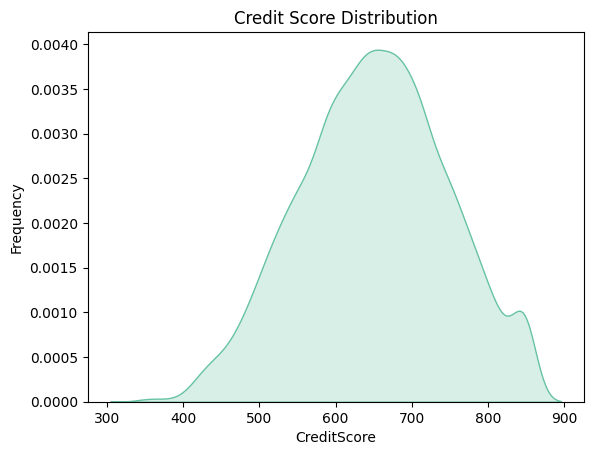

In [104]:
sns.kdeplot(df['CreditScore'],fill=True)
plt.title('Credit Score Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.show()

In [105]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [106]:
import warnings
warnings.filterwarnings("ignore")

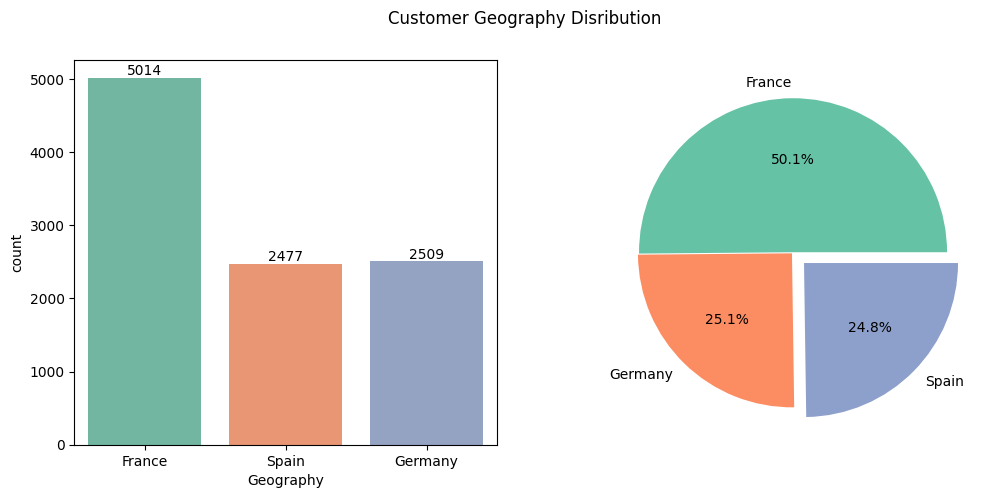

In [107]:
plt.figure(figsize = (12, 5))
plt.subplot(1,2, 1)
ax = sns.countplot(data = df, x = 'Geography', palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container)
# plt.title("Customer Geography Disribution")
plt.subplot(1,2,2)
plt.pie(df['Geography'].value_counts(), autopct = '%1.1f%%', labels = df['Geography'].value_counts().index, explode = [0,0.01,0.1])

plt.suptitle("Customer Geography Disribution")
plt.show()

In [108]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

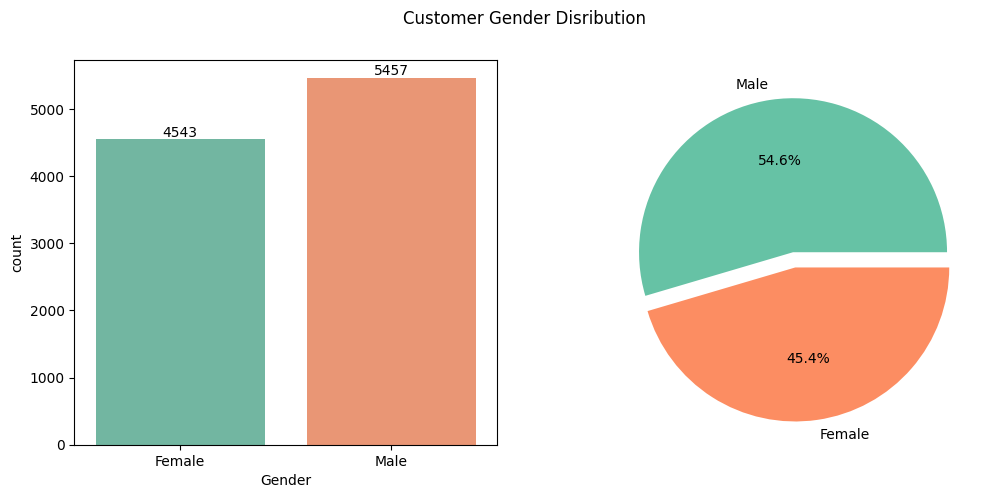

In [109]:
plt.figure(figsize = (12, 5))
plt.subplot(1,2, 1)
ax = sns.countplot(data = df, x = 'Gender',palette='Set2')
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(1,2,2)
plt.pie(df['Gender'].value_counts(), autopct = '%1.1f%%', labels = df['Gender'].value_counts().index, explode = [0,0.1])

plt.suptitle("Customer Gender Disribution")
plt.show()

In [110]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

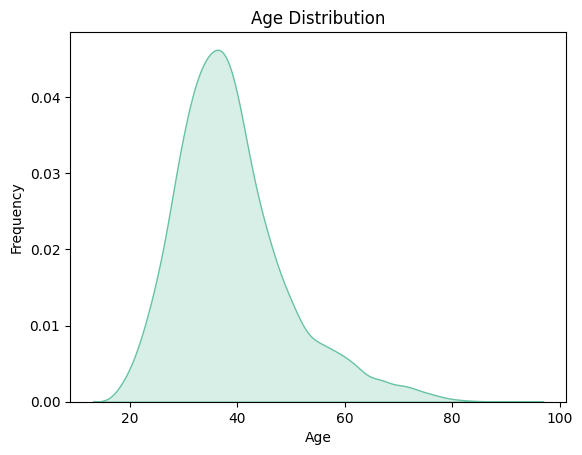

In [111]:
sns.kdeplot(df['Age'], fill = True, palette = 'Set2')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [112]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Tenure Disribution')

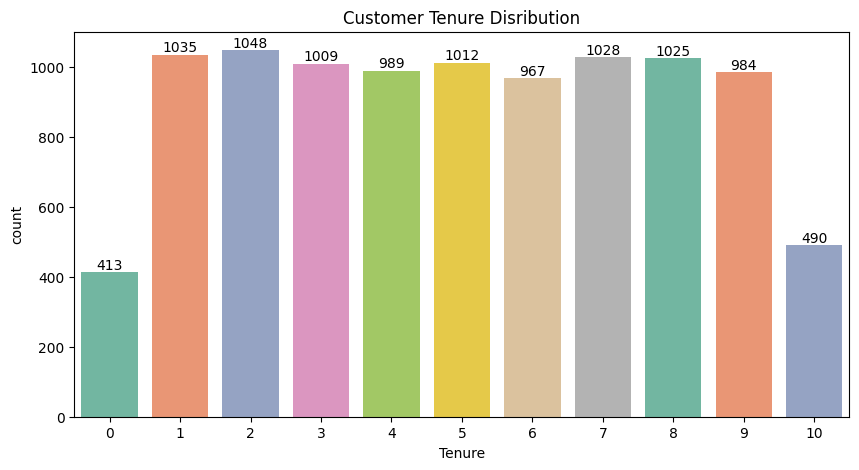

In [113]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(data = df, x = 'Tenure', palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Customer Tenure Disribution")

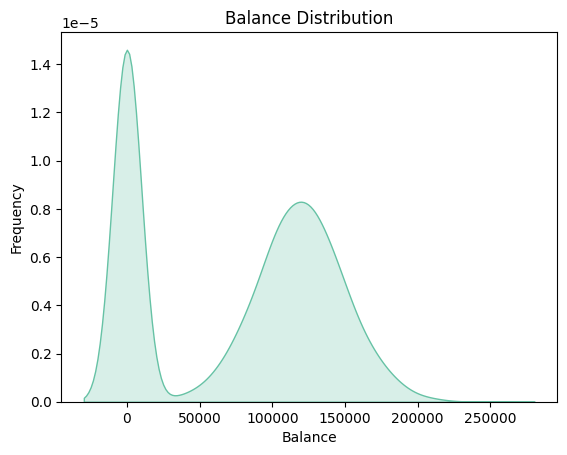

In [114]:
sns.kdeplot(data = df, x = 'Balance', fill = True, palette = 'Set2')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

A bimodal distribution in the Balance column suggests two distinct customer segments:  
Low-balance customers who may be more likely to churn.    
High-balance customers who are likely more engaged and loyal.

In [115]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

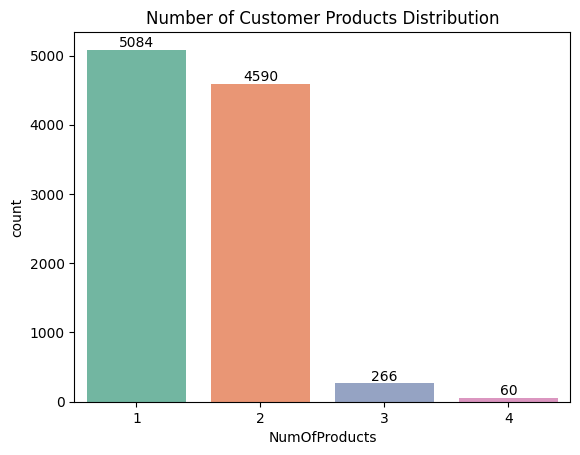

In [116]:
ax = sns.countplot(data = df, x = 'NumOfProducts', palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of Customer Products Distribution')
plt.show()

In [117]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

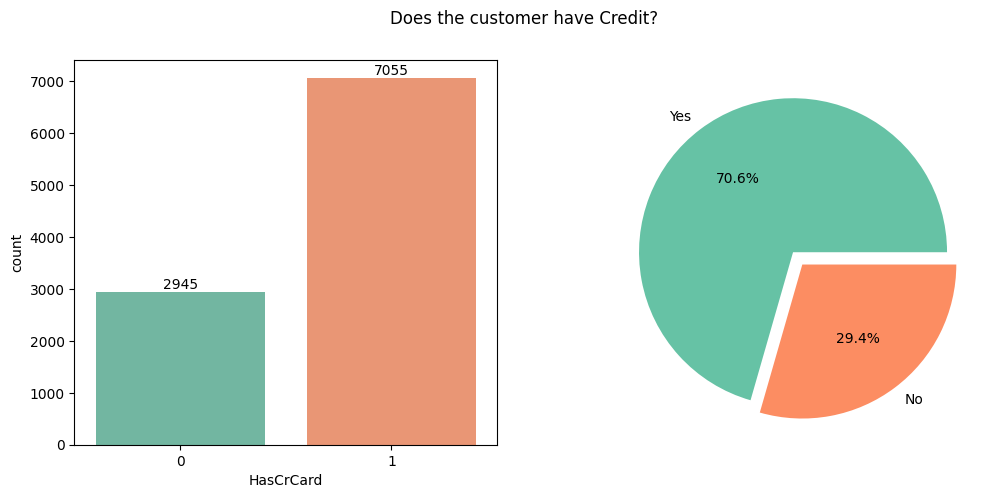

In [118]:
plt.figure(figsize = (12, 5))
plt.subplot(1,2, 1)
ax = sns.countplot(data = df, x = 'HasCrCard', palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(1,2,2)
plt.pie(df['HasCrCard'].value_counts(), autopct = '%1.1f%%', labels = ['Yes', 'No'], explode = [0,0.1],colors=sns.set_palette("Set2"))

plt.suptitle("Does the customer have Credit?")
plt.show()

In [119]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

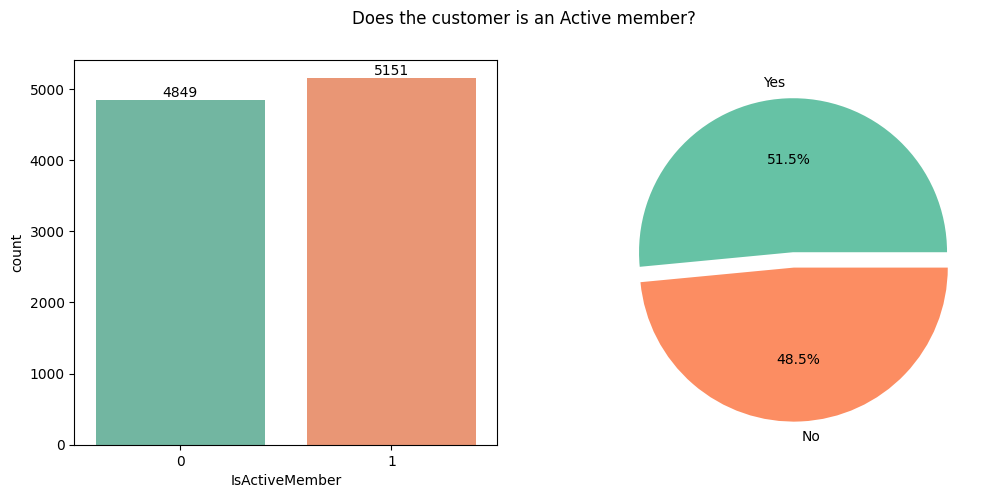

In [120]:
plt.figure(figsize = (12, 5))
plt.subplot(1,2, 1)
ax = sns.countplot(data = df, x = 'IsActiveMember', palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(1,2,2)
plt.pie(df['IsActiveMember'].value_counts(), autopct = '%1.1f%%', labels = ['Yes', 'No'], explode = [0,0.1])

plt.suptitle("Does the customer is an Active member?")
plt.show()

In [121]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

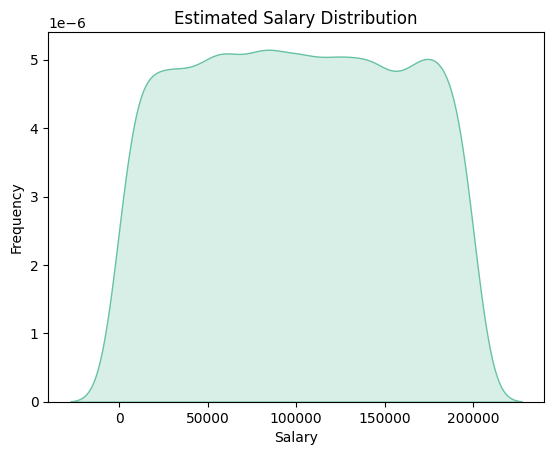

In [122]:
sns.kdeplot(df['EstimatedSalary'], fill = True)
plt.title('Estimated Salary Distribution')
plt.xlabel("Salary")
plt.ylabel('Frequency')
plt.show()

In [123]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

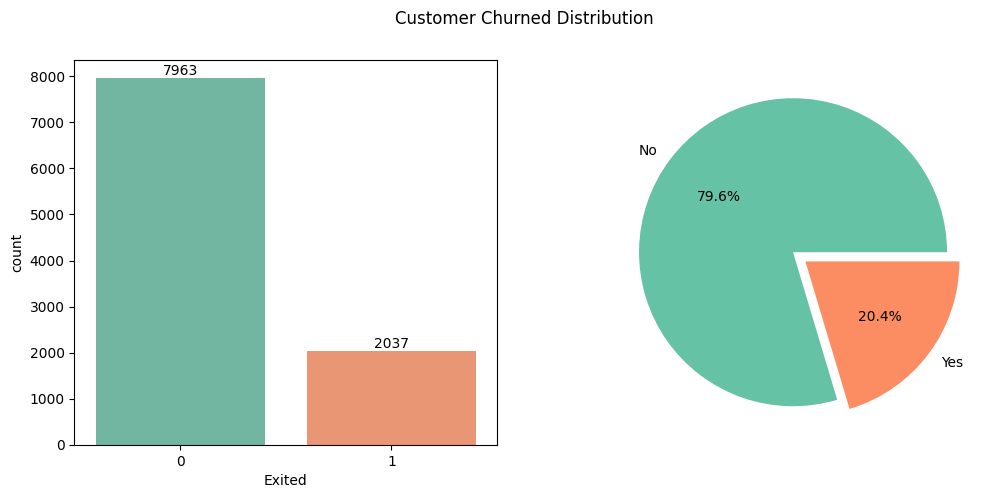

In [124]:
plt.figure(figsize = (12, 5))
plt.subplot(1,2, 1)
ax = sns.countplot(data = df, x = 'Exited', palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(1,2,2)
plt.pie(df['Exited'].value_counts(), autopct = '%1.1f%%', labels = ['No', 'Yes'], explode = [0,0.1])

plt.suptitle("Customer Churned Distribution")
plt.show()

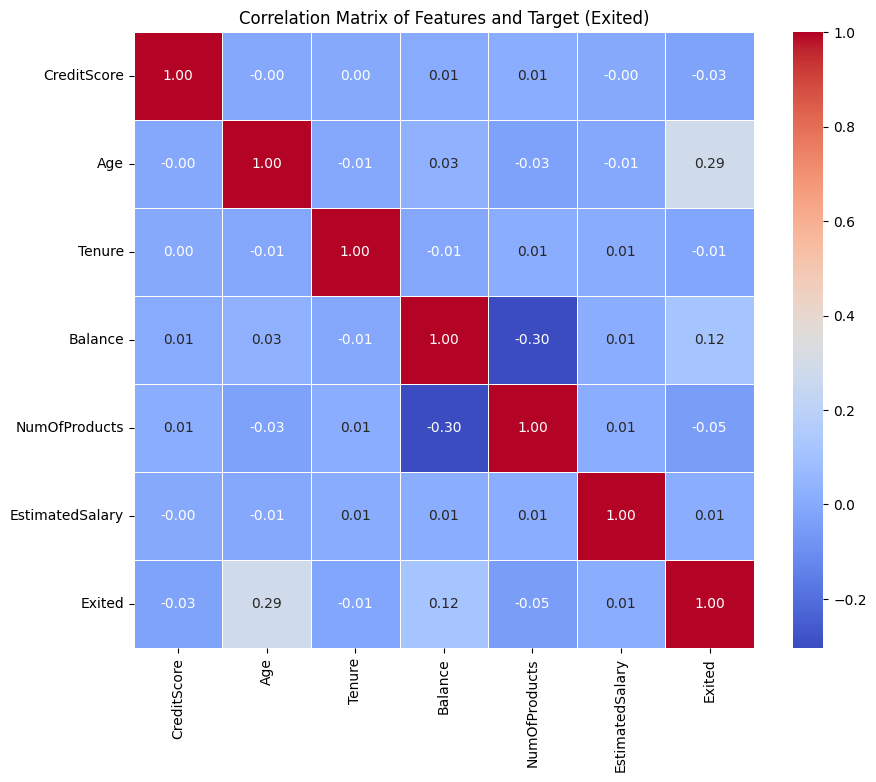

In [125]:
cols_correlation = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
corr = df[cols_correlation].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = True, fmt = '0.2f', cmap = 'coolwarm', lw = 0.5)
plt.title('Correlation Matrix of Features and Target (Exited)')
plt.show()

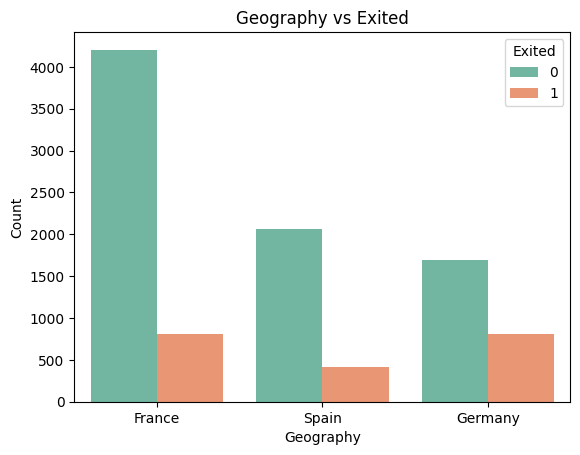

In [180]:
sns.countplot(data=df, x='Geography', hue='Exited')
plt.title('Geography vs Exited')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Exited')
plt.show()

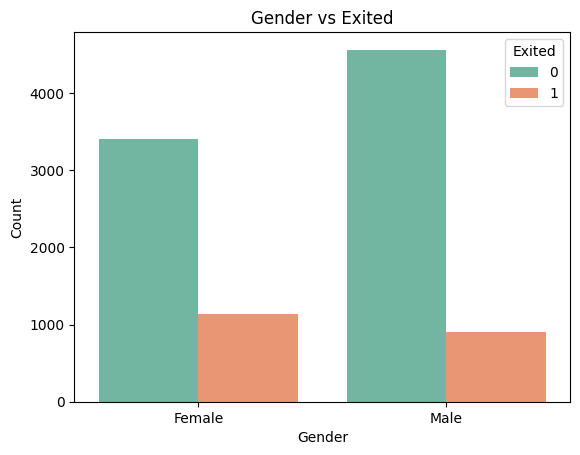

In [181]:
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Gender vs Exited')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited')
plt.show()

## Data Preprocessing

In [126]:
## now convert the catogerical features (Geography,Gender) in numerical by different encoding technique
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labelEncoder_gender = LabelEncoder()
df["Gender"] = labelEncoder_gender.fit_transform(df["Gender"])

In [127]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [128]:
oneHotEncoder_geo = OneHotEncoder()
encoded_geo = oneHotEncoder_geo.fit_transform(df[["Geography"]])

In [129]:
encoded_geo

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [130]:
encoded_geo.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [131]:
oneHotEncoder_geo.get_feature_names_out(["Geography"])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [132]:
geo_df = pd.DataFrame(encoded_geo.toarray(),columns=oneHotEncoder_geo.get_feature_names_out(["Geography"]))

In [133]:
geo_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [134]:
df = pd.concat((df.drop(["Geography"],axis = 1),geo_df),axis = 1)

In [135]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [136]:
# save the encoders
import pickle
with open("label_encoder_gender.pkl","wb") as file:
    pickle.dump(labelEncoder_gender,file)

with open("onehot_encoder_geo.pkl","wb") as file:
    pickle.dump(oneHotEncoder_geo,file)

In [137]:
# now seprate the dependent and independent features
x = df.drop(["Exited"],axis = 1)
y = df["Exited"]

In [138]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0


In [139]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [140]:
#now seprate the training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state= 0)

In [141]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [142]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [143]:
x_train

array([[ 0.16958176, -1.09168714, -0.46460796, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.91601335,  0.30102557, ..., -1.01460667,
         1.75486502, -0.57369368],
       [-1.19119591, -1.09168714, -0.94312892, ...,  0.98560362,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 ,  0.91601335, -0.36890377, ...,  0.98560362,
        -0.5698444 , -0.57369368],
       [-0.62420521, -1.09168714, -0.08179119, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-0.28401079, -1.09168714,  0.87525072, ..., -1.01460667,
         1.75486502, -0.57369368]])

In [144]:
# save the scaler
with open("scaler.pkl","wb") as file:
    pickle.dump(scaler,file)

## ANN Implementation

In [145]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [146]:
x_train.shape[1]

12

In [147]:
model = Sequential([
    Dense(64,activation="relu",input_shape=(x_train.shape[1],)), # hidden layer 1 with 64 neurons and connected to input layer
    Dense(32,activation="relu"),  ## hidden layer 2 with 32 neurons
    Dense(1,activation="sigmoid")  ## output layer and activation="sigmoid" bcz it is a binary classification problem
])

In [148]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [149]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.BinaryCrossentropy()

In [150]:
loss

<LossFunctionWrapper(<function binary_crossentropy at 0x000002167DE61120>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

In [151]:
# now compile the model
model.compile(optimizer=opt,loss=loss,metrics=["accuracy"])

In [152]:
## you can also directly write like this
## model.compile( optimizer="Adam" , loss="binary_crossentropy" , metrics=["accuracy"])

In [156]:
# now set up the tensorboard

# Create a log directory using the current date and time
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [157]:
## Set up Early Stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [158]:
# train the model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,callbacks=[tensorboard_callback,early_stopping_callback])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8079 - loss: 0.4385 - val_accuracy: 0.8620 - val_loss: 0.3610
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8573 - loss: 0.3458 - val_accuracy: 0.8635 - val_loss: 0.3469
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8599 - loss: 0.3390 - val_accuracy: 0.8645 - val_loss: 0.3392
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8632 - loss: 0.3361 - val_accuracy: 0.8630 - val_loss: 0.3489
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8576 - loss: 0.3352 - val_accuracy: 0.8585 - val_loss: 0.3522
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8636 - loss: 0.3340 - val_accuracy: 0.8620 - val_loss: 0.3460
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8610 - loss: 0.3364 - val_accuracy: 0.8600 - val_loss: 0.3390
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8666 - loss: 0.3272 - val_accu

In [160]:
y_pred_prob = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [161]:
y_pred_prob

array([[0.29195714],
       [0.31502953],
       [0.21716082],
       ...,
       [0.17228813],
       [0.23378964],
       [0.17671804]], dtype=float32)

In [162]:
y_pred = (y_pred_prob > 0.5).astype(int)

In [163]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.86
Precision: 0.7049180327868853
Recall: 0.5308641975308642
F1 Score: 0.6056338028169014
[[1505   90]
 [ 190  215]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.70      0.53      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



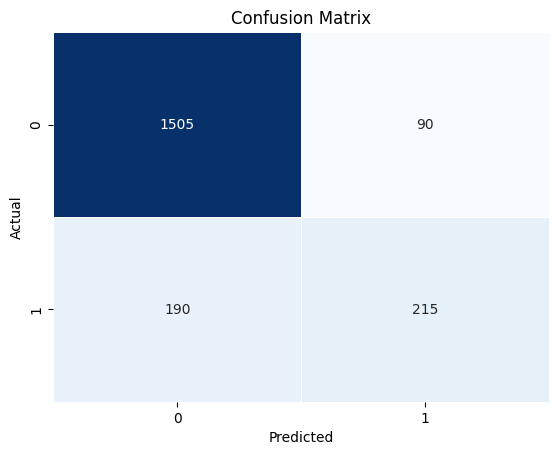

In [166]:
con_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix, annot=True, fmt='1.0f', cmap='Blues', lw=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

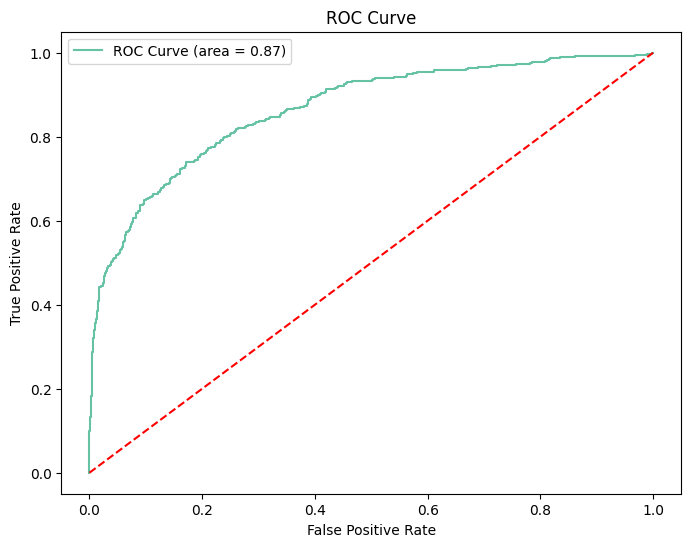

AUC Score: 0.8650443128604048


In [167]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="ROC Curve (area = %0.2f)" % auc)
plt.plot([0,1],[0,1],'r--')  # Random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC Score:", auc)

In [168]:
# now save the mode
model.save("model.h5")

In [1]:
# load tensorboard extension
%load_ext tensorboard

In [2]:
%tensorboard --logdir logs/fit

In [171]:
## we can see validation and train three times because i have tun the whole code thrice